In [1]:
import numpy as np
import pandas as pd

# Utilities
import sys
sys.path.insert(0, '../../utils')
import ipynb.fs.full.vector as uvec
import ipynb.fs.full.pyplot as uplt

### Import dataset

In [2]:
dataset = pd.read_csv('position-salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

### Scale variables

Independent & dependent vars have different means, deviations... hence should use separate scalers. \
StandardScaler takes 2-D array/vertical vector as input hence transform dependent var (y)

In [3]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(uvec.verticalize(y))

In [4]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [5]:
print(np.ravel(y))

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


### Train Support Vector Regression model

In [6]:
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(X, y.ravel()) # flatten 2-D array y

SVR()

### Predict new results

With a scaled dataset, we have to pay attention to the scales of inputs & outputs (predicts) as well

In [7]:
scaled_input = X_scaler.transform([[6.5]])
scaled_predict = model.predict(scaled_input)
predict = y_scaler.inverse_transform(scaled_predict)
print(predict)

[170370.0204065]


### Visualize the model

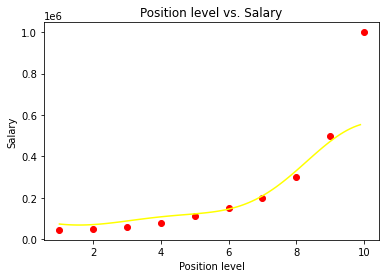

In [8]:
uplt.visualize_model(model = model, features = X, results = y, 
                feature_label = 'Position level', result_label = 'Salary', 
                feature_scaler = X_scaler, result_scaler = y_scaler)